In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



In [2]:
df = pd.read_csv("twitter_sentiment_data.csv")

In [3]:
df.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [6]:
df.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

In [7]:
text_df = df.drop (['sentiment', 'tweetid'], axis=1)
text_df.head()

,message
0,@tiniebeany climate change is an interesting h...
1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,Fabulous! Leonardo #DiCaprio's film on #climat...
3,RT @Mick_Fanning: Just watched this amazing do...
4,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [8]:
print(text_df['message'].iloc[0],"\n")
print(text_df['message'].iloc[1],"\n")
print(text_df['message'].iloc[2],"\n")
print(text_df['message'].iloc[3],"\n")
print(text_df['message'].iloc[4],"\n")

@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom 

RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦ 

Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube 

RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im 

RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦ 



In [9]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  43943 non-null  object
dtypes: object(1)
memory usage: 343.4+ KB


In [10]:
def data_processing(message):
    message = message.lower()
    message = re.sub(r"https\S+|www\S+https\S+", '',message, flags=re.MULTILINE)
    message = re.sub(r'\@w+|\#','',message)
    message = re.sub(r'[^\w\s]','',message)
    message_tokens = word_tokenize(message)
    filtered_message = [w for w in message_tokens if not w in stop_words]
    return " ".join(filtered_message)

In [11]:
text_df = text_df.drop_duplicates('message')

In [12]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [13]:
text_df.message = text_df['message'].apply(data_processing)

In [14]:
text_df['message'] = text_df['message'].apply(lambda x: stemming(x))

In [15]:
text_df.head()

,message
0,tiniebeany climate change interesting hustle g...
1,rt natgeochannel watch beforetheflood right le...
2,fabulous leonardo dicaprios film climate chang...
3,rt mick_fanning watched amazing documentary le...
4,rt cnalive pranita biswasi lutheran odisha giv...


In [16]:
print(text_df['message'].iloc[0],"\n")
print(text_df['message'].iloc[1],"\n")
print(text_df['message'].iloc[2],"\n")
print(text_df['message'].iloc[3],"\n")
print(text_df['message'].iloc[4],"\n")

tiniebeany climate change interesting hustle global warming planet stopped warming 15 yes suv boom 

rt natgeochannel watch beforetheflood right leodicaprio travels world tackle climate change httãââ 

fabulous leonardo dicaprios film climate change brilliant watch via youtube 

rt mick_fanning watched amazing documentary leonardodicaprio climate change think thisãââ 

rt cnalive pranita biswasi lutheran odisha gives testimony effects climate change amp natural disasters poãââ 



In [17]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41033 entries, 0 to 43942
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  41033 non-null  object
dtypes: object(1)
memory usage: 641.1+ KB


In [18]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [19]:
text_df['polarity'] = text_df['message'].apply(polarity)

In [20]:
text_df.head(10)

,message,polarity
0,tiniebeany climate change interesting hustle g...,0.250000
1,rt natgeochannel watch beforetheflood right le...,0.285714
2,fabulous leonardo dicaprios film climate chang...,0.650000
3,rt mick_fanning watched amazing documentary le...,0.300000
4,rt cnalive pranita biswasi lutheran odisha giv...,0.100000
5,unamshow awache kujinga na iko global warming,0.000000
7,rt cciriviera presidential candidate donaldtru...,0.000000
8,rt americanindian8 leonardo dicaprios climate ...,0.200000
9,beforetheflood watch beforetheflood right leod...,0.285714
10,rt drdejarnett vital public health community a...,0.050000


In [21]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [22]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [23]:
text_df.head()

,message,polarity,sentiment
0,tiniebeany climate change interesting hustle g...,0.250000,Positive
1,rt natgeochannel watch beforetheflood right le...,0.285714,Positive
2,fabulous leonardo dicaprios film climate chang...,0.650000,Positive
3,rt mick_fanning watched amazing documentary le...,0.300000,Positive
4,rt cnalive pranita biswasi lutheran odisha giv...,0.100000,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

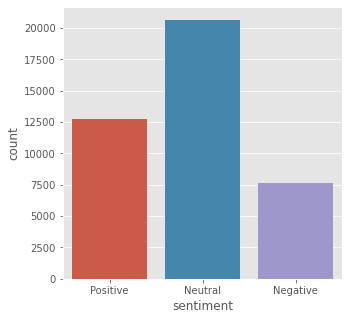

In [24]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

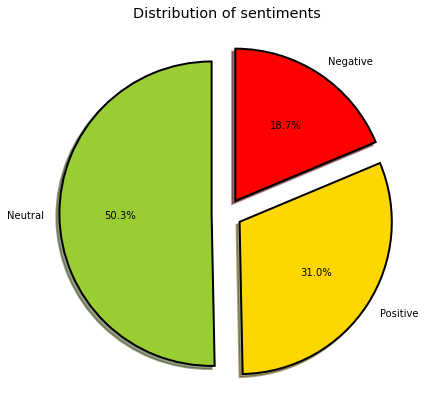

In [25]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [26]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,message,polarity,sentiment
24878,rt nytimesworld islamic state climate change s...,1.0,Positive
13985,rt davidsirota apparently best way fight clima...,1.0,Positive
39203,rt gregghoulden rt region9teaparty huffpo comb...,1.0,Positive
41110,rt chrisdelia mediator qtrump would climate ch...,1.0,Positive
27212,prime_politics wonderful earth climate change ...,1.0,Positive


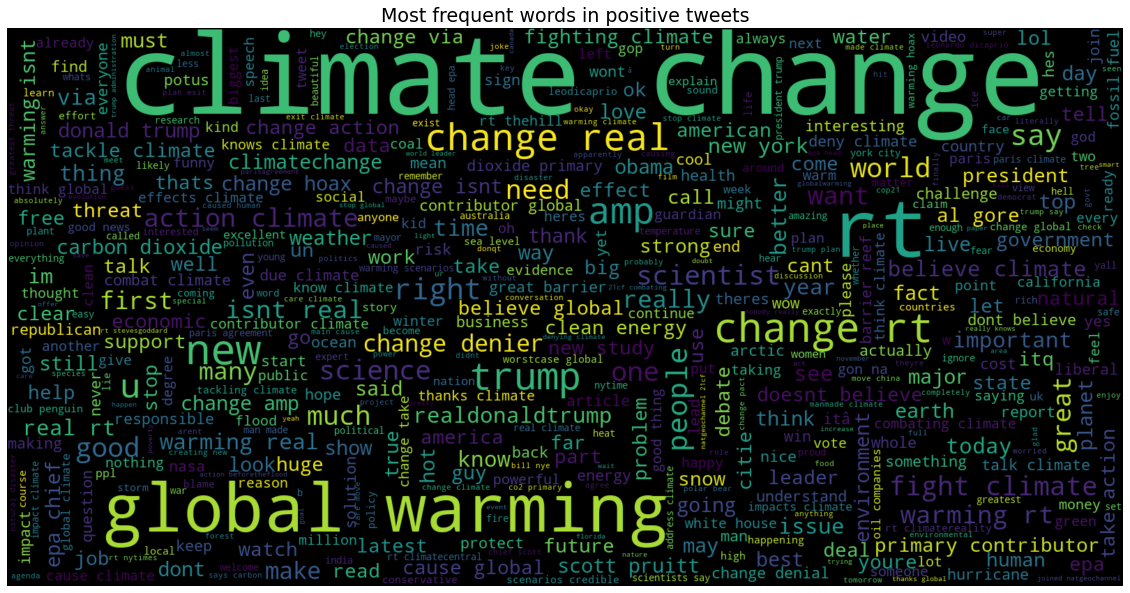

In [28]:
text = ' '.join([word for word in pos_tweets['message']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [29]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,message,polarity,sentiment
1497,thick girl weather damn near nonexistent thank...,-6.938894e-18,Negative
14816,rt politifact false epascottpruitt says co2 pr...,-1.850372e-17,Negative
12647,alexwattsesq good job environmentalism sham cl...,-1.850372e-17,Negative
14822,rt craigrozniecki epa head scott pruitt says c...,-1.850372e-17,Negative
9384,literary writers resist telling stories climat...,-2.775558e-17,Negative


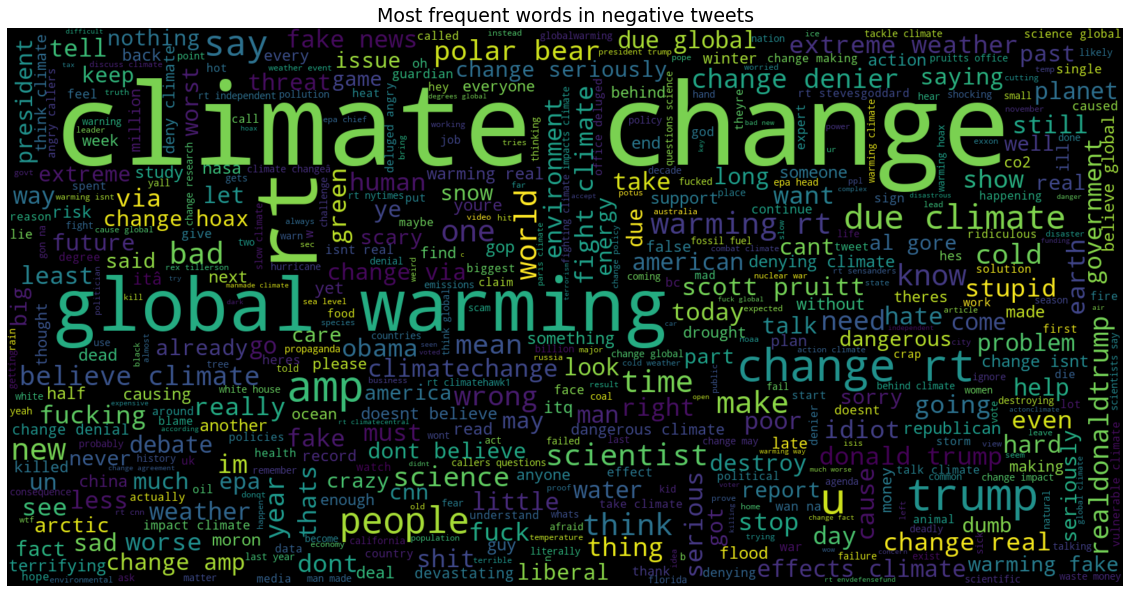

In [30]:
text = ' '.join([word for word in neg_tweets['message']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [31]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,message,polarity,sentiment
5,unamshow awache kujinga na iko global warming,0.0,Neutral
30773,scottpresler somewhere set comedian climate ch...,0.0,Neutral
30723,apcentralregion republican voters dont underst...,0.0,Neutral
30722,rt clevelanddotcom climate change affect cleve...,0.0,Neutral
30721,blame global warming maga cspanwj,0.0,Neutral


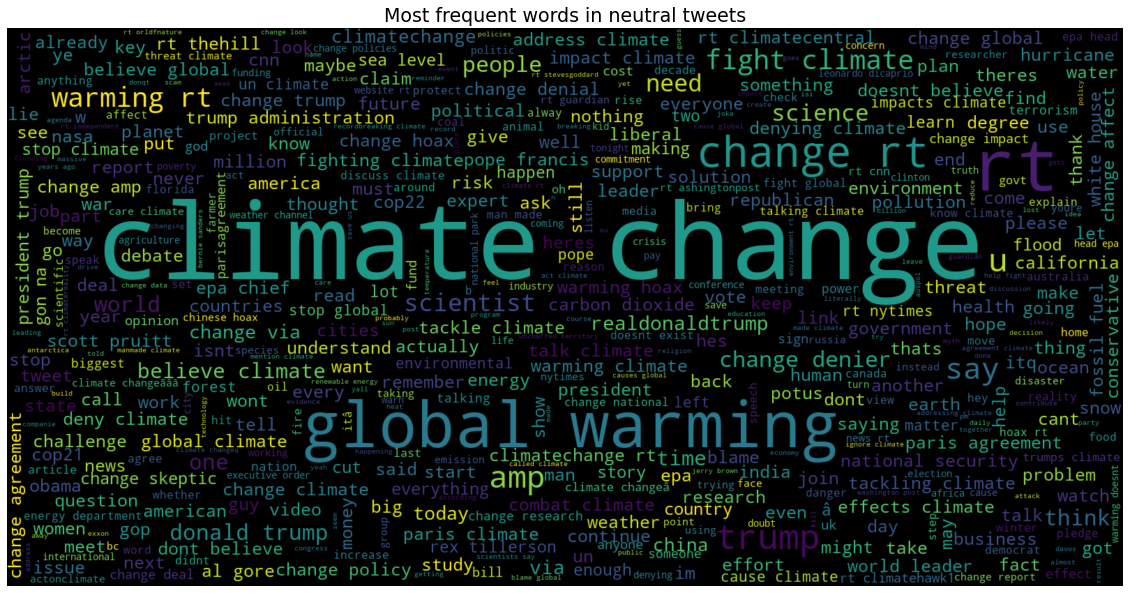

In [32]:
text = ' '.join([word for word in neutral_tweets['message']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [33]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['message'])

In [34]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 294379

First 20 features:
 ['000', '000 usd', '000005', '0000058', '0000058 defendscie', '0001jatt', '0001jatt humans', '0005c', '0005c warming', '000we', '000we need', '001harpinder', '001harpinder semiarid', '004', '004 change', '007', '009barca', '009barca madmasterr', '00kevin7', '00kevin7 manny_ottawa']


/Users/rishabhsancheti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
X = text_df['message']
Y = text_df['sentiment']
X = vect.transform(X)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (32826, 294379)
Size of y_train: (32826,)
Size of x_test: (8207, 294379)
Size of y_test: (8207,)


In [38]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.76%


/Users/rishabhsancheti/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[1136  260  112]
 [  13 4145   22]
 [  55  296 2168]]


              precision    recall  f1-score   support

    Negative       0.94      0.75      0.84      1508
     Neutral       0.88      0.99      0.93      4180
    Positive       0.94      0.86      0.90      2519

    accuracy                           0.91      8207
   macro avg       0.92      0.87      0.89      8207
weighted avg       0.91      0.91      0.91      8207



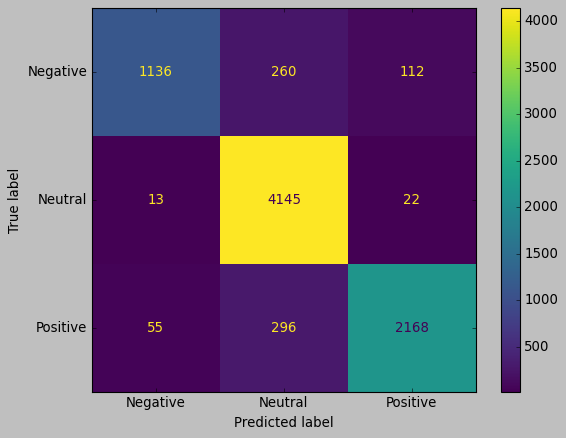

In [40]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

/Users/rishabhsancheti/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rishabhsancheti/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [43]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [44]:
y_pred = grid.predict(x_test)

In [45]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.95%


In [46]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1181  224  103]
 [  13 4142   25]
 [  57  239 2223]]


              precision    recall  f1-score   support

    Negative       0.94      0.78      0.86      1508
     Neutral       0.90      0.99      0.94      4180
    Positive       0.95      0.88      0.91      2519

    accuracy                           0.92      8207
   macro avg       0.93      0.89      0.90      8207
weighted avg       0.92      0.92      0.92      8207



In [47]:
from sklearn.svm import LinearSVC

In [48]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [49]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 93.47%


In [50]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[1250  161   97]
 [  13 4141   26]
 [  57  182 2280]]


              precision    recall  f1-score   support

    Negative       0.95      0.83      0.88      1508
     Neutral       0.92      0.99      0.96      4180
    Positive       0.95      0.91      0.93      2519

    accuracy                           0.93      8207
   macro avg       0.94      0.91      0.92      8207
weighted avg       0.94      0.93      0.93      8207



In [51]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

/Users/rishabhsancheti/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rishabhsancheti/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rishabhsancheti/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rishabhsancheti/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rishabhsancheti/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rishabhsancheti/opt/ana

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [52]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [53]:
y_pred = grid.predict(x_test)

In [54]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.43%


In [55]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1249  159  100]
 [  14 4141   25]
 [  61  180 2278]]


              precision    recall  f1-score   support

    Negative       0.94      0.83      0.88      1508
     Neutral       0.92      0.99      0.96      4180
    Positive       0.95      0.90      0.93      2519

    accuracy                           0.93      8207
   macro avg       0.94      0.91      0.92      8207
weighted avg       0.94      0.93      0.93      8207

